In [1]:
import _pickle as cp
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from pylab import * 
import math
import sklearn as sk
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model


class NBC:
    
	def __init__(self, feature_types, num_classes):
		self.feature_types = feature_types
		self.num_classes = num_classes
		self.theta = [] # matrix of parameters
		self.class_count = {} # hashtable for the number of occurences of each class
		self.total = 0 # total number of labels
		
	def fit(self, Xtrain, ytrain):
		class_count = {}
		(M,N) = Xtrain.shape
		self.total = self.num_classes + ytrain.shape[0]
		
		for i in range(self.num_classes):
			class_count[i] =1
		for c in ytrain:
			class_count[c] +=1
		
		ma = [[[] for i in range(N)] for j in range(M)] # rows correspond to classes, each entry is a vector which belongs to that class
		for i in range(len(ytrain)):
			for (nr,x) in enumerate(Xtrain[i]):
				ma[int(ytrain[i])][nr].append(x)
				
		theta = [[[] for i in range(N)] for j in range(self.num_classes)]
		
		for c in range(self.num_classes):
			for i in range(N):
				if(self.feature_types[i] == 'r'):
					if(len(ma[c][i])>0):
						theta[c][i] = (np.mean(ma[c][i]), np.var(ma[c][i]))
					else:
						theta[c][i] = (0,0)
				elif(self.feature_types[i] == 'b'):
					theta[c][i] = (len(ma[c][i]) - sum(ma[c][i])+1, sum(ma[c][i]) +1) # we add 1 in order to avoid having 0 occurences of one of the binary classes
				
		self.theta = theta
		self.class_count = class_count
		
	def predict_vector(self, x):
		LLH = math.log(1.0 * self.class_count[0] / self.total)
		
		for j in range(len(x)):
			if(self.feature_types[j] == 'r'):
				LLH += math.log(0.1 + scipy.stats.norm(self.theta[0][j][0], 0.1 + math.sqrt(self.theta[0][j][1])).pdf(x[j])) # added 0.1 to standard dev to avoid diving by 0 and added 0.1 to the argument of log to avoid log(0)
			elif(self.feature_types[j] == 'b'):
				if(x[j] == 0):
					LLH += math.log(self.theta[0][j][0] / (self.theta[0][j][0] + self.theta[0][j][1]))
				elif(x[j] == 1):
					LLH += math.log(self.theta[0][j][1] / (self.theta[0][j][0] + self.theta[0][j][1]))
				
		maxi = LLH
		y = 0
		
		for i in range(1,self.num_classes):
			LLH = math.log(1.0 * self.class_count[i] / self.total)
			for j in range(len(x)):
				if(self.feature_types[j] == 'r'):
					LLH += math.log(0.1 + scipy.stats.norm(self.theta[i][j][0], 0.1 + math.sqrt(self.theta[i][j][1])).pdf(x[j])) # added 0.1 to standard dev to avoid diving by 0 and added 0.1 to the argument of log to avoid log(0)
				elif(self.feature_types[j] == 'b'):
					if(x[j] == 0):
						LLH += math.log(self.theta[i][j][0] / (self.theta[i][j][0] + self.theta[i][j][1]))
					elif(x[j] == 1):
						LLH += math.log(self.theta[i][j][1] / (self.theta[i][j][0] + self.theta[i][j][1]))
					
			if(LLH>maxi):
				maxi = LLH
				y = i
		return y
		
	def predict(self, Xtest):
		yhat = []
		for x in Xtest:
			yhat.append(self.predict_vector(x))
		return yhat
    
	def __init__(self, feature_types, num_classes):
		self.feature_types = feature_types
		self.num_classes = num_classes
		self.theta = [] # matrix of parameters
		self.class_count = {} # hashtable for the number of occurences of each class
		self.total = 0 # total number of labels
		
	def fit(self, Xtrain, ytrain):
		class_count = {}
		(M,N) = Xtrain.shape
		self.total = self.num_classes + ytrain.shape[0]
		
		for i in range(self.num_classes):
			class_count[i] =1
		for c in ytrain:
			class_count[c] +=1
		
		ma = [[[] for i in range(N)] for j in range(M)] # rows correspond to classes, each entry is a vector which belongs to that class
		for i in range(len(ytrain)):
			for (nr,x) in enumerate(Xtrain[i]):
				ma[int(ytrain[i])][nr].append(x)
				
		theta = [[[] for i in range(N)] for j in range(self.num_classes)]
		
		for c in range(self.num_classes):
			for i in range(N):
				if(self.feature_types[i] == 'r'):
					if(len(ma[c][i])>0):
						theta[c][i] = (np.mean(ma[c][i]), np.var(ma[c][i]))
					else:
						theta[c][i] = (0,0)
				elif(self.feature_types[i] == 'b'):
					theta[c][i] = (len(ma[c][i]) - sum(ma[c][i])+1, sum(ma[c][i]) +1) # we add 1 in order to avoid having 0 occurences of one of the binary classes
				
		self.theta = theta
		self.class_count = class_count
		
	def predict_vector(self, x):
		LLH = math.log(1.0 * self.class_count[0] / self.total)
		
		for j in range(len(x)):
			if(self.feature_types[j] == 'r'):
				LLH += math.log(0.1 + scipy.stats.norm(self.theta[0][j][0], 0.1 + math.sqrt(self.theta[0][j][1])).pdf(x[j])) # added 0.1 to standard dev to avoid diving by 0 and added 0.1 to the argument of log to avoid log(0)
			elif(self.feature_types[j] == 'b'):
				if(x[j] == 0):
					LLH += math.log(self.theta[0][j][0] / (self.theta[0][j][0] + self.theta[0][j][1]))
				elif(x[j] == 1):
					LLH += math.log(self.theta[0][j][1] / (self.theta[0][j][0] + self.theta[0][j][1]))
				
		maxi = LLH
		y = 0
		
		for i in range(1,self.num_classes):
			LLH = math.log(1.0 * self.class_count[i] / self.total)
			for j in range(len(x)):
				if(self.feature_types[j] == 'r'):
					LLH += math.log(0.1 + scipy.stats.norm(self.theta[i][j][0], 0.1 + math.sqrt(self.theta[i][j][1])).pdf(x[j])) # added 0.1 to standard dev to avoid diving by 0 and added 0.1 to the argument of log to avoid log(0)
				elif(self.feature_types[j] == 'b'):
					if(x[j] == 0):
						LLH += math.log(self.theta[i][j][0] / (self.theta[i][j][0] + self.theta[i][j][1]))
					elif(x[j] == 1):
						LLH += math.log(self.theta[i][j][1] / (self.theta[i][j][0] + self.theta[i][j][1]))
					
			if(LLH>maxi):
				maxi = LLH
				y = i
		return y
		
	def predict(self, Xtest):
		yhat = []
		for x in Xtest:
			yhat.append(self.predict_vector(x))
		return yhat

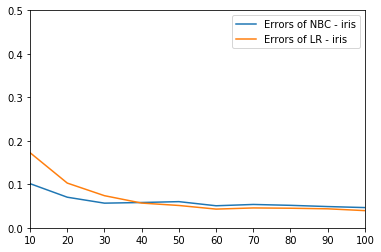

In [2]:
# Take C to be 1/(2*lambda) = 5

iris = load_iris()
X_iris, y_iris = iris['data'], iris['target']
errors_NBC_iris = []
errors_LR_iris = []
ratios = []
N, D = X_iris.shape
repeat = 200

for k in range(10):
	total_acc_NBC_iris = 0
	total_acc_LR_iris = 0
	for t in range(repeat):
		NBC_iris = NBC(['r','r','r','r'],3)
		LR_iris = linear_model.LogisticRegression(C= 5.00)
		ratio = (k+1.0)/10
		
		N_train = int(0.8*N)
		N_test = N - N_train
		shuffler = np.random.permutation(N)
		X_train = X_iris[shuffler[:N_train]]
		y_train = y_iris[shuffler[:N_train]]
		X_test = X_iris[shuffler[N_train:]]
		y_test = y_iris[shuffler[N_train:]]
		
		N_train_ratio = int(ratio*N_train)
		X_train_ratio = X_train[:N_train_ratio]
		y_train_ratio = y_train[:N_train_ratio]
		
		NBC_iris.fit(X_train_ratio, y_train_ratio)
		LR_iris.fit(X_train_ratio, y_train_ratio)
		
		yhat_NBC_iris = NBC_iris.predict(X_test)
		test_acc_NBC_iris = np.mean(yhat_NBC_iris == y_test)
		total_acc_NBC_iris += test_acc_NBC_iris

		yhat_LR_iris = LR_iris.predict(X_test)
		test_acc_LR_iris = np.mean(yhat_LR_iris == y_test)
		total_acc_LR_iris += test_acc_LR_iris
		
	error_NBC_iris = 1.0 - total_acc_NBC_iris / repeat
	error_LR_iris = 1.0 - total_acc_LR_iris / repeat
	ratio = (k+1.0)*10
	errors_NBC_iris.append(error_NBC_iris)
	errors_LR_iris.append(error_LR_iris)
	ratios.append(ratio)

plt.axis([10,100,0,0.5])
plt.plot(ratios, errors_NBC_iris, label = 'Errors of NBC - iris')
plt.plot(ratios, errors_LR_iris, label = 'Errors of LR - iris')
plt.legend(loc = 'upper right')
plt.show() 

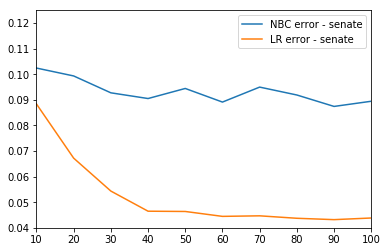

In [3]:
X_senate, y_senate = cp.load(open('voting.pickle','rb'))
N,D = X_senate.shape
repeat = 200

errors_NBC_senate = []
errors_LR_senate = []
ratios = []

for k in range(10):
	total_acc_NBC_senate = 0
	total_acc_LR_senate = 0
	for t in range(repeat):
		NBC_senate = NBC(['b']*16,2)
		LR_senate = linear_model.LogisticRegression(C=5.00)
		ratio = (k+1.0)/10
		
		N_train = int(0.8*N)
		N_test = N - N_train
		shuffler = np.random.permutation(N)
		X_train = X_senate[shuffler[:N_train]]
		y_train = y_senate[shuffler[:N_train]]
		X_test = X_senate[shuffler[N_train:]]
		y_test = y_senate[shuffler[N_train:]]
		
		N_train_ratio = int(ratio*N_train)
		X_train_ratio = X_train[:N_train_ratio]
		y_train_ratio = y_train[:N_train_ratio]
		
		NBC_senate.fit(X_train, y_train_ratio)
		LR_senate.fit(X_train_ratio, y_train_ratio)
		
		yhat_NBC_senate = NBC_senate.predict(X_test)
		test_acc_NBC_senate = np.mean(yhat_NBC_senate == y_test)
		total_acc_NBC_senate += test_acc_NBC_senate
		
		yhat_LR_senate = LR_senate.predict(X_test)
		test_acc_LR_senate = np.mean(yhat_LR_senate == y_test)
		total_acc_LR_senate += test_acc_LR_senate
	
	error_NBC_senate = 1.0 - total_acc_NBC_senate / repeat
	error_LR_senate = 1.0 - total_acc_LR_senate / repeat
	ratio = (k+1.0)*10
	errors_NBC_senate.append(error_NBC_senate)
	errors_LR_senate.append(error_LR_senate)
	ratios.append(ratio)

plt.axis([10,100,0.04,0.125])
plt.plot(ratios, errors_NBC_senate, label = 'NBC error - senate')
plt.plot(ratios, errors_LR_senate, label = 'LR error - senate')
plt.legend(loc='upper right')
plt.show()